# Euler-Lagrange | Péndulos

[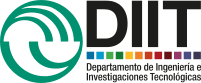](https://ingenieria.unlam.edu.ar/)    
[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES) 
2021 [Víctor A. Bettachini](mailto:vbettachini@unlam.edu.ar)  

---

## Lagrangiano
> Referencia: Apunte Lanczos $\S5$

El Lagrangiano (o función Lagrangiana) de un sistema es determinado por la energía cinética $T$ y el potencial $V$ de este sistema expresados en función de coordenadas, velocidades generalizadas y eventualmente el tiempo,
$$
\mathcal{L} (q_i, \dot{q}_i, t)= T(q_i, \dot{q}_i, t) - V(q_i, \dot{q}_i, t).
$$

## Péndulo ideal
![](figuras/pénduloHorizontal.png)   
Un péndulo simple conviene trabajarlo en coordenadas cilíndricas.
En estas un péndulo rígido e ideal tiene una única componente no nula de su velocidad: la que va en $\hat{\varphi}$, es decir, $\dot{\vec{r}} \cdot \hat{\varphi}= \ell \dot{\varphi}$.

In [1]:
import sympy as sym # importamos funciones de cálculo simbólico
from sympy.physics import mechanics as mech # de sympy utilizaremos funciones de mecánica
mech.init_vprinting() # notación con punto para la velocidad y punto punto para la aceleración
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Defino los parámetros físicos del sistema
m, g, l = sym.symbols('m, g, \ell', positive=True)

# Defino coordenadas generalizadas
N = mech.ReferenceFrame('N') # sistema de referencia en coordenadas cartesianas
t = sym.symbols('t') # tiempo
phi = sym.Function(r'\varphi')(t)

In [3]:
m_r = l*(sym.sin(phi)* N.x - sym.cos(phi)* N.y )  # recordemos que tomamos y hacia arriba
m_r

In [4]:
# Energía cinética
unMedio = sym.Rational(1,2) # Rational: fracción de enteros, alternativamente podría haberse usado 0.5 
m_v = m_r.diff(t,N)
m_T = unMedio* m* m_v.dot(m_v)
T_ideal = sym.Eq(sym.Symbol('T'), m_T ).simplify() # simplify: simplifica usando factor común y otras operaciones
T_ideal

Si se estable $V(y_0)= 0$ el potencial gravitatorio es $V(y)= m g y$, pero al usar coordenadas cilíndricas la expresión es

In [5]:
# Energía potencial
V_ideal = sym.Eq(sym.Symbol('V'), - (m* g* (- N.y)).dot(m_r) ).simplify()
V_ideal

### Lagrangiano del péndulo ideal
Con las $T$ y $V$ previamente calculadas puede escribirse el Lagrangiano de este péndulo ideal
$$
\mathcal{L}(\varphi, \dot{\varphi})= T(\dot{\varphi}) - V(\varphi)
$$

In [6]:
L_ideal = sym.Eq(sym.Function('\mathcal{L}')(phi, phi.diff(t) ) , T_ideal.rhs - V_ideal.rhs ) 
L_ideal

## Ecuación de Euler-Lagrange

> Referencia: Apunte Lanczos $\S6$

La ecuación de Euler-Lagrange para una coordenada generalizada $q$ es
$$
\begin{aligned}
\frac{\partial \mathcal{L} }{\partial q} &- \frac{\mathrm{d}}{\mathrm{d} t} \frac{\partial \mathcal{L} }{\partial \dot{q} }=0 \\
\end{aligned}.
$$


Para una partícula libre que se mueve en $\hat{x}$ el Lagrangiano es la energía cinética
$$
\mathcal{L} = T = \frac{m}{2} \dot{x}^2 .
$$
Si se diferencia en la velocidad $\dot{x}$ se obtiene el momento lineal
$$
p_x = \frac{\partial}{\partial \dot{x}} \mathcal{L} = \frac{\partial}{\partial \dot{x}} T = m \dot{x} .
$$

Esto mismo se aplica para toda coordenada generalizada haciendo que los momentos generalizados se obtengan de 
$$
p_i = \frac{\partial}{\partial \dot{q_i}} \mathcal{L}. 
$$
Se utiliza esto para dar nombre `dtdp` a la parte de la ecuación de Euler-Lagrange en que

$$\frac{\mathrm{d}}{\mathrm{d}t} \frac{\partial}{\partial \dot{q_i}} \mathcal{L} = \frac{\mathrm{d}}{\mathrm{d}t} p_i$$
se deriva respecto al tiempo el momento generalizado $p_i$.

De manera similar el derivar respecto a la coordenada generalizada

$$
\frac{\partial}{\partial q_i} \mathcal{L},
$$
se notara como `dq`.

### Ecuación de Euler-Lagrange del péndulo ideal
Utilizaremos este sencillo sistema para mostrar que Euler-Lagrange permite obtener las mismas ecuaciones de la dinámica que se obtenienen con la 2.a ley de Newton.   

Planteamos la ecuación de Euler-Lagrange correspondiente para la única coordenada generalizada, $\varphi$
$$
\begin{aligned}
\frac{\partial \mathcal{L} }{\partial \varphi} &- \frac{\mathrm{d}}{\mathrm{d} t} \frac{\partial \mathcal{L} }{\partial \dot{\varphi} }=0 \\
\end{aligned}.
$$

Empezamos calculando `phi_dtdp`
$$
\frac{\mathrm{d}}{\mathrm{d}t} \frac{\partial}{\partial \dot{\varphi_i}} \mathcal{L}
$$

In [7]:
phi_dtdp = L_ideal.rhs.diff(phi.diff(t)).diff(t) # primero deriva respecto a x1 punto y luego a t
phi_dtdp.simplify()

Y luego `phi_dq`
$$
\frac{\partial}{\partial \varphi_i} \mathcal{L}
$$

In [8]:
phi_dq = L_ideal.rhs.diff(phi)
phi_dq.simplify()

Y con estos se escribe la ecuación de Euler-Lagrange

In [9]:
phi_EL = sym.Eq((phi_dq - phi_dtdp).simplify(), 0)
phi_EL

De aquí puede despejarse

In [10]:
sym.Eq(phi.diff(t,2), sym.solve(phi_EL, phi.diff(t,2) )[0] )

que es la misma ecuación obtenida aplicando la 2.a ley de Newton.

## Péndulo con punto de suspensión libre
>Ejercicio 2 sección 5 ($\S 5$) de  
Lev Davidovich Landau, y E. M. Lifshitz. Mecánica. 2.a. Curso de física teórica. Reverté, 1994.

![](figuras/landauS52_fig2.png "Figura 2 del libro de Landau.")  

In [11]:
# Defino los parámetros físicos del sistema
m1, m2, g, l = sym.symbols('m_1, m_2, g, \ell', positive=True)

# Defino coordenadas generalizadas 
t = sym.symbols('t') # tiempo
x = sym.Function('x')(t) # posición partícula 1 es función del tiempo
phi = sym.Function(r'\varphi')(t) # posición partícula 2 es función del tiempo

# posiciones
m1_r = x* N.x
m2_r = m1_r + l* (sym.cos(phi)* (-N.y) + sym.sin(phi)* (N.x)) # recordemos que tomamos y hacia arriba

In [12]:
# velocidades
m1_v = m1_r.diff(t,N) # derivada respecto a t en el marco referencial N
m2_v = m2_r.diff(t,N)

# velocidades al cuadrado es decir producto punto con si mismo
m1_v_cuadrado = m1_v.dot(m1_v)
m2_v_cuadrado = m2_v.dot(m2_v)

# Energía cinética
unMedio = sym.Rational(1,2) # Rational: fracción de enteros, alternativamente podría haberse usado 0.5 
m1_T = unMedio* m1* m1_v_cuadrado
m2_T = unMedio* m2* m2_v_cuadrado
T_libre = sym.Eq(sym.Symbol('T'), (m1_T + m2_T).simplify() ) # simplify: simplifica usando factor común y otras operaciones
T_libre

In [13]:
# Energía potencial
m1_V = 0
m2_V = - (m2* g* (- N.y)).dot(m2_r)
V_libre= sym.Eq(sym.Symbol('V'), (m1_V + m2_V ).simplify() )
V_libre

### Lagrangiano

Con $T$ y $V$ finalmente expresamos
$$
\mathcal{L} (\dot{x}, \varphi, \dot{\varphi})=
T(\dot{x}, \varphi, \dot{\varphi}) - V(\varphi).
$$

In [ ]:
L_libre = sym.Eq(sym.Function('\mathcal{L}')(x.diff(t), phi, phi.diff(t) ), (T_libre.rhs - V_libre.rhs).simplify() )
L_libre

### Ecuaciones de Euler-Lagrange

En el sistema tenemos dos grados de libertad que describimos con las coordenadas generalizadas $x_1$ y $\varphi$.
Deben obtenerse sendas ecuaciones de Euler-Lagrange.

La de $x$ será
$$
\frac{\partial \mathcal{L} }{\partial x} - \frac{\mathrm{d}}{\mathrm{d} t} \frac{\partial \mathcal{L} }{\partial \dot{x}} = 0
$$



La parte izquierda es sencilla porque $x$ no figura en el Lagrangiano entonces
$$
\frac{\partial \mathcal{L} }{\partial x} = 0.
$$

La parte derecha la resolvemos en dos pasos. Primero la derivada parcial respecto a la coordenada generalizada
$$
\frac{\partial \mathcal{L} }{\partial \dot{x}} =
(m_1 + m_2) \dot{x} + m_2 \ell \cos{(\varphi)} \dot{\varphi}.
$$

Y esto a su vez le aplicamos la derivada total respecto a $t$
$$
\frac{\mathrm{d}}{\mathrm{d} t} \frac{\partial \mathcal{L} }{\partial \dot{x}} =
(m_1 + m_2) \ddot{x} + m_2 \ell ( - \sin{(\varphi)} \dot{\varphi}^2 +  \cos{(\varphi)} \ddot{\varphi} ).
$$

Juntando ambas partes tenemos

$$
\begin{aligned}
\frac{\partial \mathcal{L} }{\partial x} -& \frac{\mathrm{d}}{\mathrm{d} t} \frac{\partial \mathcal{L} }{\partial \dot{x} } = 0 \\
0 -&  \left[ (m_1 + m_2) \ddot{x} + m_2 \ell ( - \sin{(\varphi)} \dot{\varphi}^2
 +  \cos{(\varphi)} \ddot{\varphi} ) \right] = 0 \\
 & m_1 \ddot{x} + m_2 ( - \ell \sin{(\varphi)} \dot{\varphi}^2 +  \ell \cos{(\varphi)} \ddot{\varphi} + \ddot{x} ) = 0.
\end{aligned}
$$

In [15]:
x_libre_EL = sym.Eq(L_libre.rhs.diff(x) - L_libre.rhs.diff(x.diff(t) ).diff(t) ).simplify()
x_libre_EL

Para $\varphi$ la expresión es un poco más compleja

$$
\begin{aligned}
\frac{\partial \mathcal{L} }{\partial \varphi} &- \frac{\mathrm{d}}{\mathrm{d} t} \frac{\partial \mathcal{L} }{\partial \dot{\varphi}}=0 \\
\left[ m_2 g \ell (-\sin{\varphi}) + m_2 \dot{x} \ell (-\sin{\varphi}) \dot{\varphi} \right]
 &- \frac{\mathrm{d}}{\mathrm{d} t} \left[ 
   m_2 \ell^2 \dot{\varphi}
 + m_2 \dot{x} \ell \cos{\varphi} 
 \right] =0 \\
 (-\sin{\varphi}) \left[ m_2 g \ell + m_2 \dot{x} \ell \dot{\varphi} \right]
 &-  m_2 \left[ 
     \ell^2 \ddot{\varphi}
  + \dot{x} \ell (-\sin{\varphi}) \dot{\varphi}
  + \ddot{x} \ell \cos{\varphi}
 \right] =0.
\end{aligned}
$$

In [16]:
phi_libre_EL = sym.Eq(L_libre.rhs.diff(phi) - L_libre.rhs.diff(phi.diff(t) ).diff(t) )
phi_libre_EL

Esto puede simplificarse

In [17]:
phi_libre_EL.simplify()

Resolver la dinámica de las ecuaciones de Euler-Lagrange acopladas ($\ddot{x}$ figura en ambas) es algo que haremos más adelante en el curso cuando hagamos simulaciones numéricas con la computadora.

### Recuperando el péndulo ideal

Podemos recuperar el caso del péndulo rígido ideal a partir del péndulo de suspensión libre si "inmovilizamos" $m_1$ estableciendo $x \equiv 0$ y por tanto $\dot{x} = 0$.

En el Lagrangiano

In [18]:
substituciones = {
    x : 0,
    x.diff(t) : 0,
}
L_libre.subs(substituciones)

que es el del péndulo ideal. 

Lo mismo puede hacerse en la ecuación de Euler-Lagrange para $\varphi$

In [20]:
phi_libre_EL_subs = phi_libre_EL.subs(substituciones).simplify()
phi_libre_EL_subs

donde entre paréntesis figura la ecuación de la dinámica para el péndulo ideal de la que puede despejarse

In [21]:
sym.Eq(phi.diff(t,2), sym.solve(phi_libre_EL_subs, phi.diff(t,2) )[0] )